In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from skimage.color import *
import cv2
from my_commonfunctions import *

matplotlib.rcParams['figure.dpi'] = 200

In [2]:
test3_gray = (rgb2gray(io.imread('test3.png')) * 255).astype(np.uint8)
#test3_binary = test3_gray < 200
#test3_thresholded_gray = gray2rgb(test3_binary * 255).astype(np.uint8)
#print(test3_thresholded_gray.dtype)

/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  """Entry point for launching an IPython kernel.


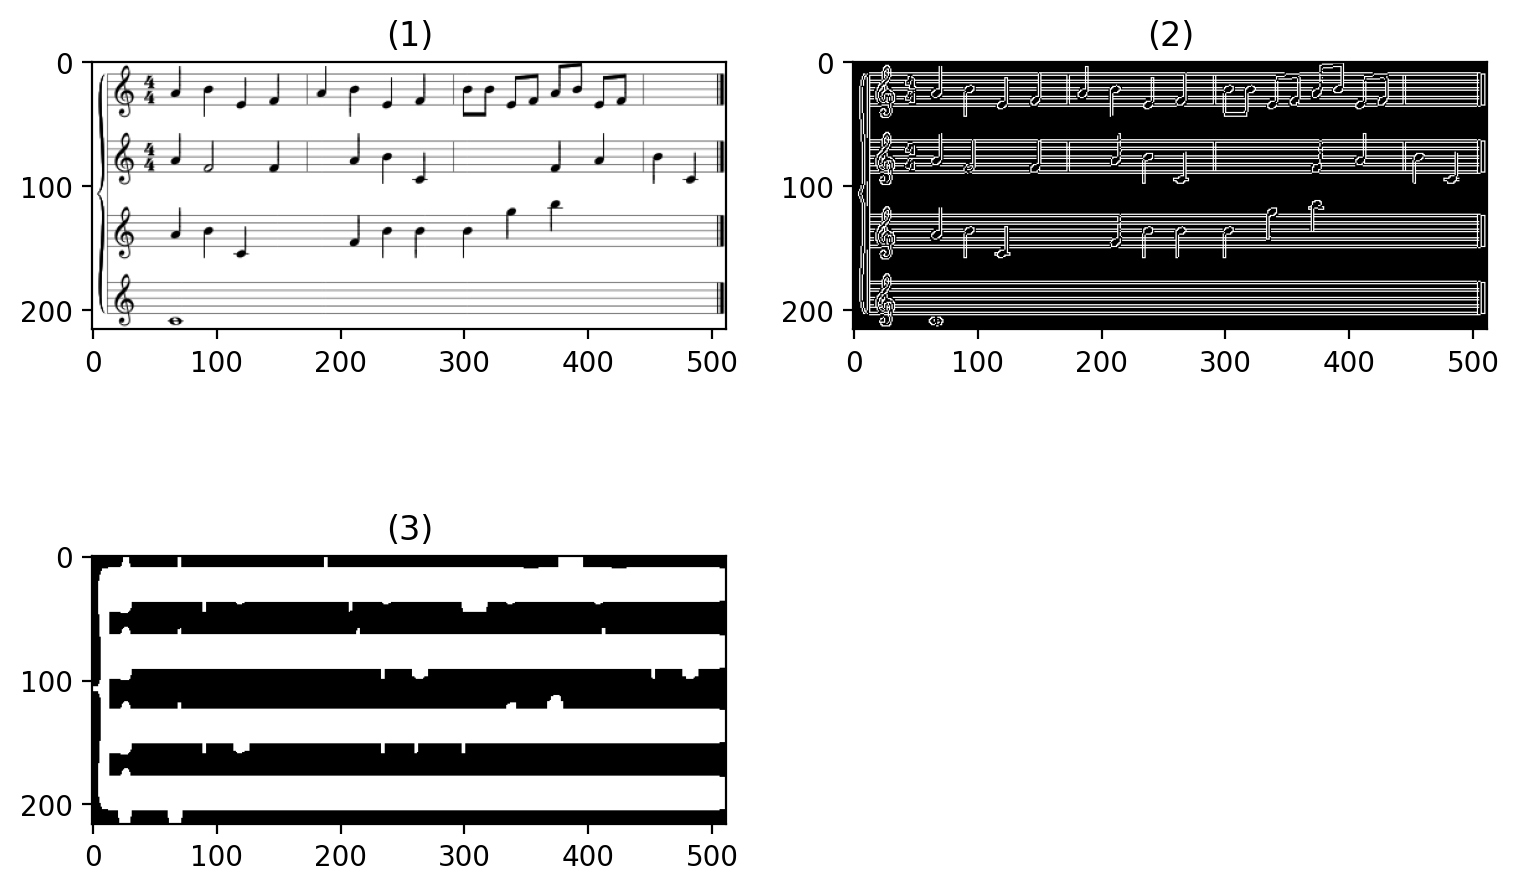

In [23]:
# 1. Canny
edges = cv2.Canny(test3_gray, 100, 200)
# 2. Closing
kc1 = np.ones((9, 9))
closed1 = my_close(edges, kc1)
my_show_images([test3_gray, edges, closed1], row_max=2)

In [24]:
# 3. White pixels freq in each row
closed1_bin = closed1 > 200
sum_of_rows = np.sum(closed1_bin, axis=1) # Sum of each row
img_width = test3_gray.shape[1]
is_line = (sum_of_rows / img_width) > 0.8 # Normalization & thresholding (If percentage of white pixels of each row is 80% or higher, this row is considered a line)


In [25]:
is_line

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,

In [26]:
# 4. Contours of is_line
image, init_contours, hierarchy = cv2.findContours((is_line*255).astype(np.uint8), 
                                              cv2.RETR_TREE, 
                                              cv2.CHAIN_APPROX_SIMPLE)
init_contours = np.array(init_contours).squeeze()
init_contours_y = init_contours.T[1].T

In [27]:
# 5. Mid point between each 2 contours
init_contours_y_flattened_sorted = np.sort(init_contours_y.flatten())
init_contours_y_flattened_sorted_2_consecutive = init_contours_y_flattened_sorted[1:-1].reshape(-1, 2)
init_contour_y_mid_points = np.mean(init_contours_y_flattened_sorted_2_consecutive, axis=1).astype(np.int32)

In [28]:
init_contours_y

array([[177, 204],
       [123, 150],
       [ 63,  90],
       [  9,  36]], dtype=int32)

In [29]:
init_contours_y.flatten()

array([177, 204, 123, 150,  63,  90,   9,  36], dtype=int32)

In [30]:
init_contours_y_flattened_sorted

array([  9,  36,  63,  90, 123, 150, 177, 204], dtype=int32)

In [31]:
init_contours_y_flattened_sorted_2_consecutive

array([[ 36,  63],
       [ 90, 123],
       [150, 177]], dtype=int32)

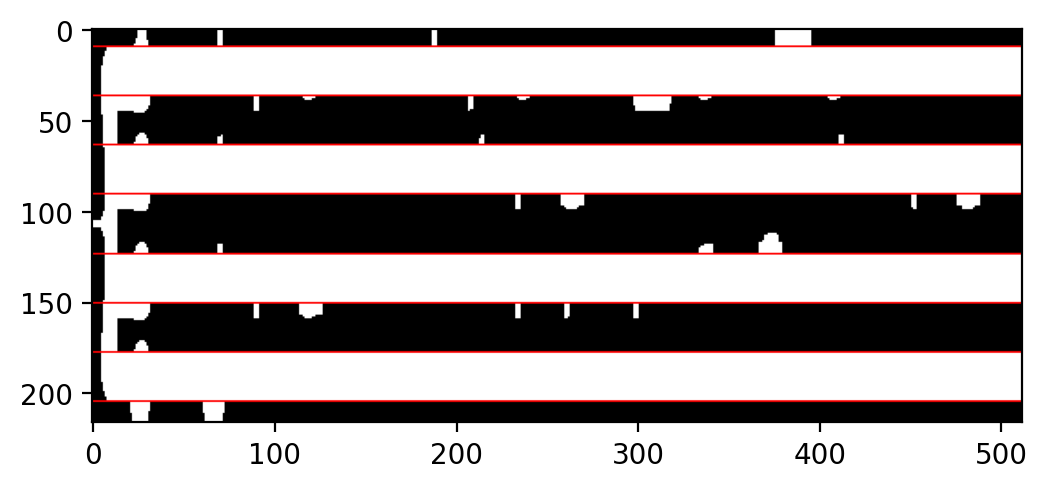

In [32]:
# Show only
init_contours_y_closed1 = gray2rgb(closed1.copy())
init_contours_y_closed1[init_contours_y.flatten()] = [255, 0, 0]
plt.imshow(init_contours_y_closed1)

In [33]:
init_contour_y_mid_points

array([ 49, 106, 163], dtype=int32)

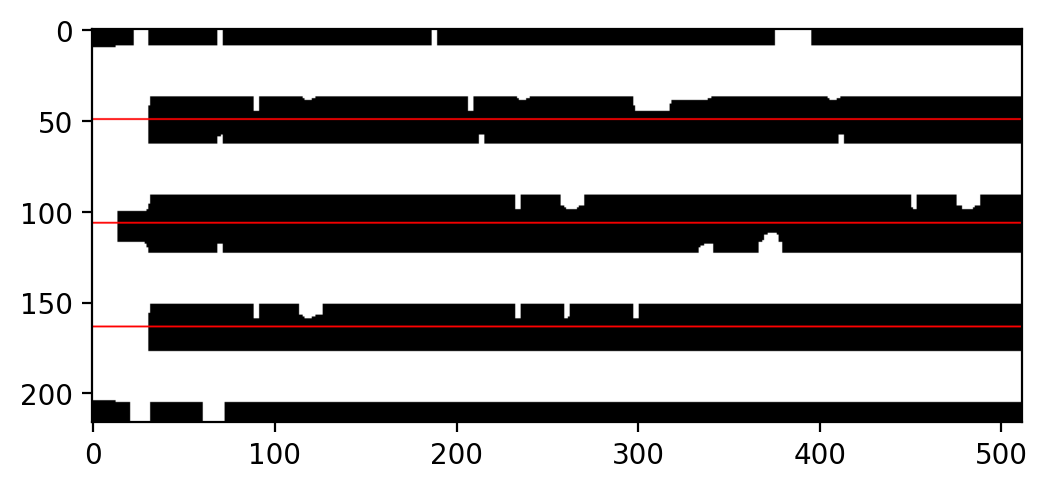

In [14]:
# Show only
init_contours_y_mid_points_closed1 = gray2rgb(closed1.copy())
init_contours_y_mid_points_closed1[init_contour_y_mid_points] = [255, 0, 0]
plt.imshow(init_contours_y_mid_points_closed1)

In [15]:
# 6. Final contours
img_height = test3_gray.shape[0]
final_contours_y = np.append(np.array([0]), init_contour_y_mid_points) # Add 0 @ the beginning
final_contours_y = np.append(final_contours_y, np.array([img_height])) # Add img_height @ the end

In [16]:
final_contours_y

array([  0,  49, 106, 163, 216])

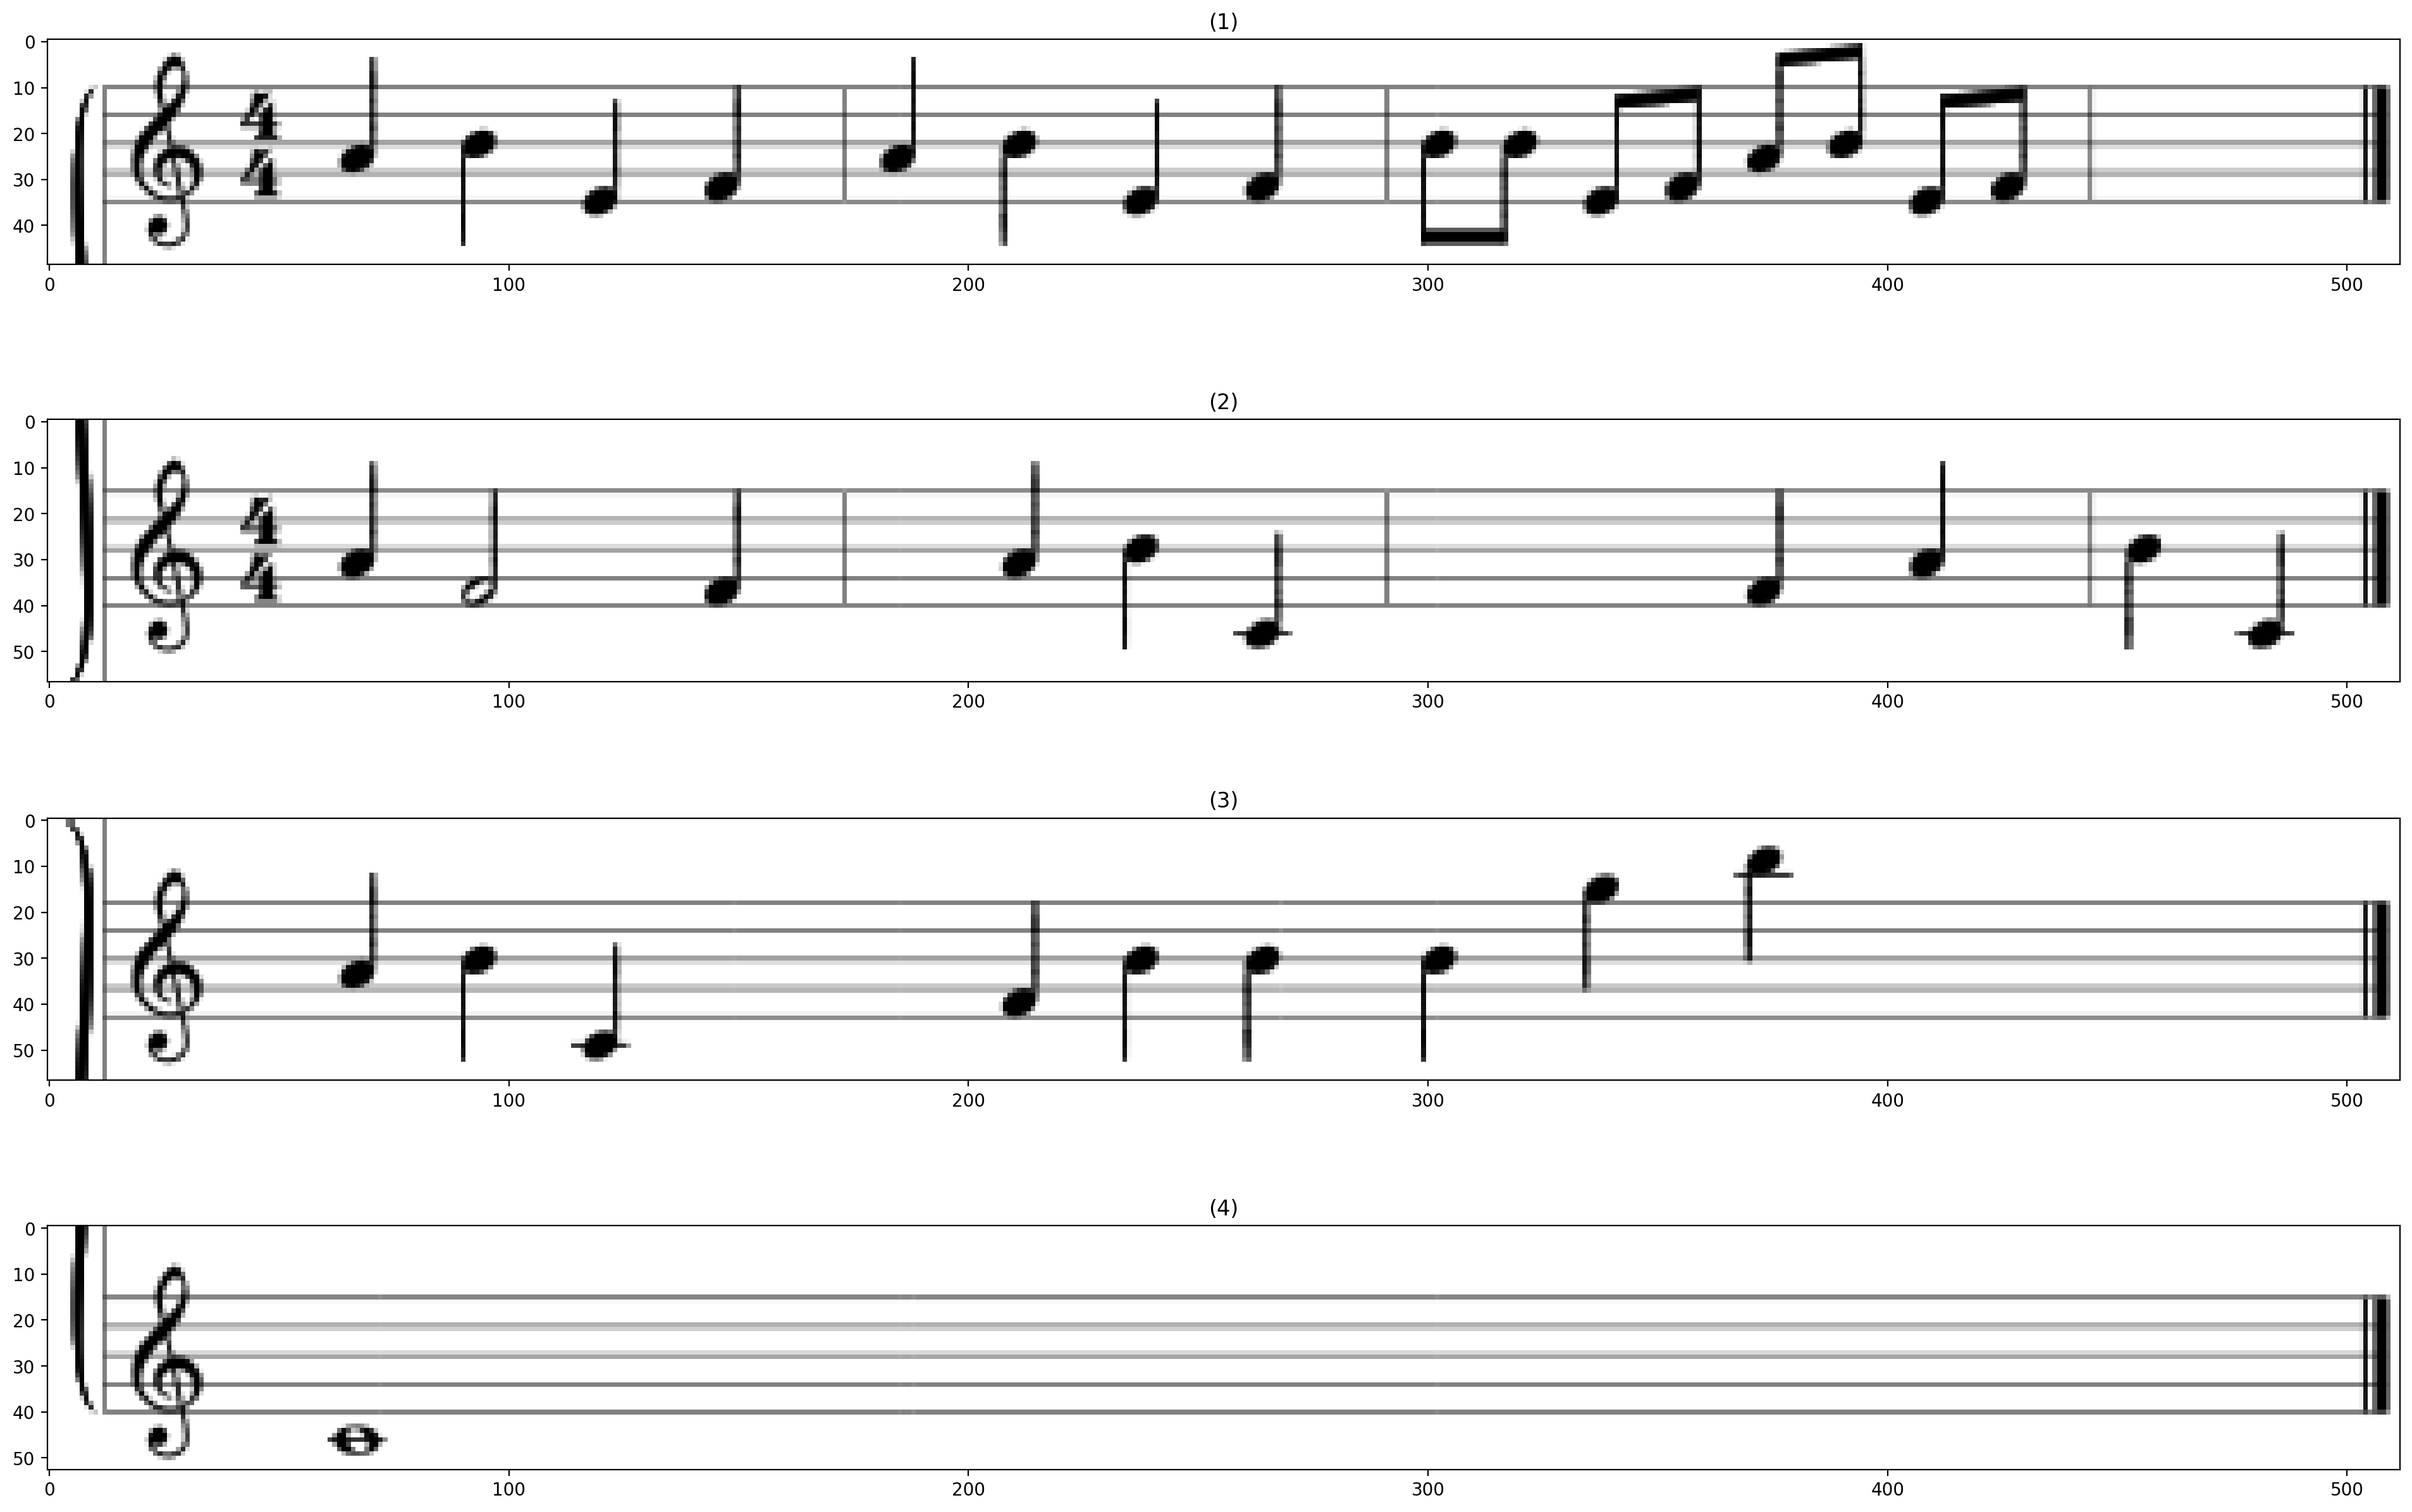

In [17]:
final_lines = []
for i in range(len(final_contours_y)-1):
    x0 = 0
    x1 = img_width
    y0 = final_contours_y[i]
    y1 = final_contours_y[i+1]
    final_lines.append(test3_gray[y0:y1, x0:x1])
    
my_show_images(final_lines, row_max=1)